# Exploratory Data Analysis Notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from scipy import stats
import numpy as np


In [2]:
df = pd.read_csv('data/jobs_in_data.csv')
df.head(5)

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [3]:
df.shape

(9355, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [5]:
df.duplicated().sum()

4014

Clearly we have a lot of duplicates, so let's drop them 

In [6]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

Let's take a look at our categorical variables:

In [7]:
job_title_counts = df['job_title'].value_counts()
print(job_title_counts)
company_location_counts = df['company_location'].value_counts()
print(company_location_counts)


job_title
Data Engineer                    1100
Data Scientist                   1039
Data Analyst                      744
Machine Learning Engineer         518
Analytics Engineer                207
                                 ... 
Deep Learning Researcher            1
Analytics Engineering Manager       1
BI Data Engineer                    1
Power BI Developer                  1
Marketing Data Engineer             1
Name: count, Length: 125, dtype: int64
company_location
United States     4301
United Kingdom     358
Canada             198
Germany             71
Spain               59
                  ... 
Gibraltar            1
Ecuador              1
Andorra              1
Mauritius            1
Malta                1
Name: count, Length: 70, dtype: int64


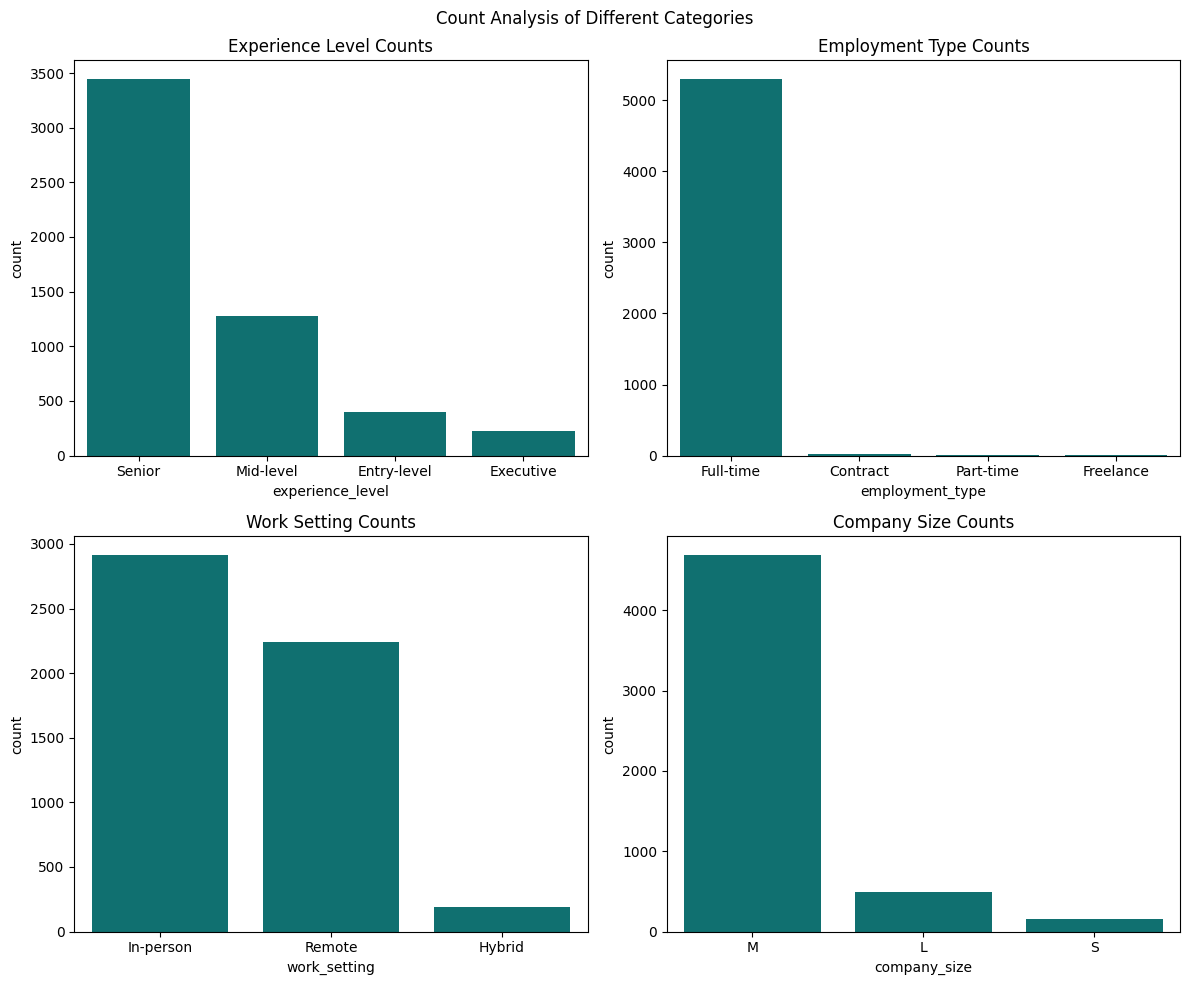

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Count Analysis of Different Categories')

sns.countplot(ax=axes[0, 0], x='experience_level', data=df, color="teal", 
              order=df['experience_level'].value_counts().index)
axes[0, 0].set_title('Experience Level Counts')

sns.countplot(ax=axes[0, 1], x='employment_type', data=df, color="teal", 
              order=df['employment_type'].value_counts().index)
axes[0, 1].set_title('Employment Type Counts')

sns.countplot(ax=axes[1, 0], x='work_setting', data=df, color="teal", 
              order=df['work_setting'].value_counts().index)
axes[1, 0].set_title('Work Setting Counts')

sns.countplot(ax=axes[1, 1], x='company_size', data=df, color="teal", 
              order=df['company_size'].value_counts().index)
axes[1, 1].set_title('Company Size Counts')

plt.tight_layout()
plt.show()

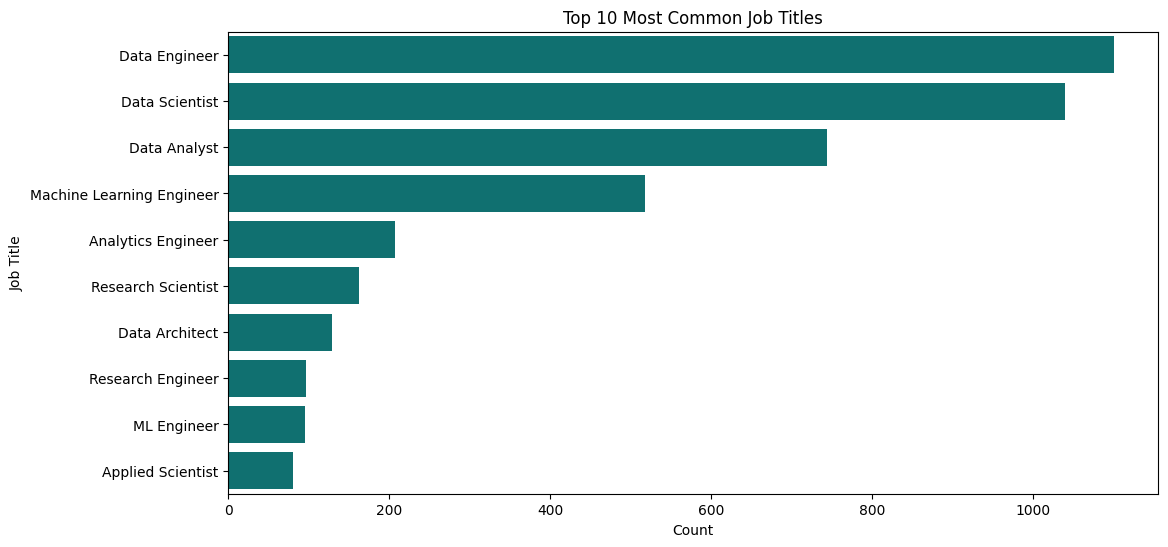

In [9]:
# Getting the top 10 most common job titles
top_job_titles = df['job_title'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_job_titles.values, y=top_job_titles.index, color="teal")
plt.title('Top 10 Most Common Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()



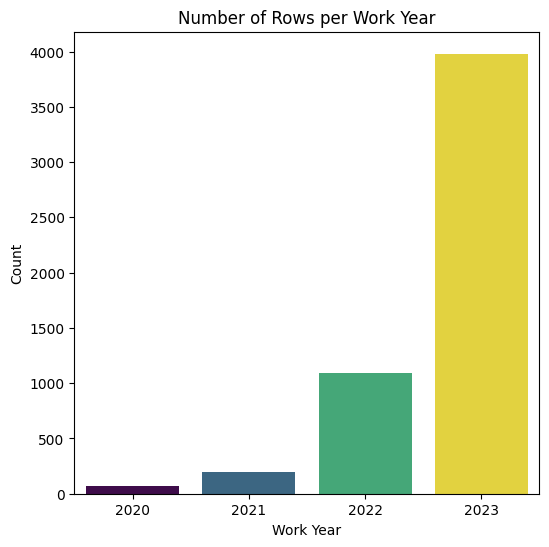

In [10]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='work_year', hue='work_year', palette='viridis', legend=False)
plt.title('Number of Rows per Work Year')
plt.xlabel('Work Year')
plt.ylabel('Count')
plt.show()

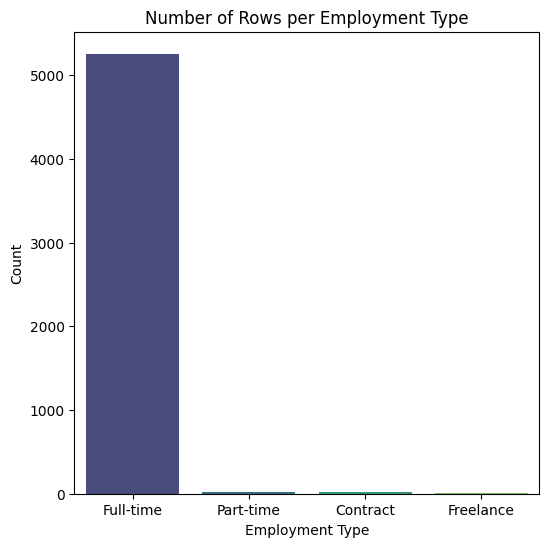

In [44]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='employment_type', hue='employment_type', palette='viridis', legend=False)
plt.title('Number of Rows per Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.show()

let's look at our numerical variables:

In [11]:
df.describe()

,work_year,salary,salary_in_usd
count,5341.000000,5341.000000,5341.000000
mean,2022.682082,145814.937839,146258.409099
std,0.608026,67025.469452,66594.117529
min,2020.000000,14000.000000,15000.000000
25%,2022.000000,97300.000000,98506.000000
50%,2023.000000,140000.000000,140000.000000
75%,2023.000000,186200.000000,186000.000000
max,2023.000000,450000.000000,450000.000000


Let's explore our label - salary_in_usd

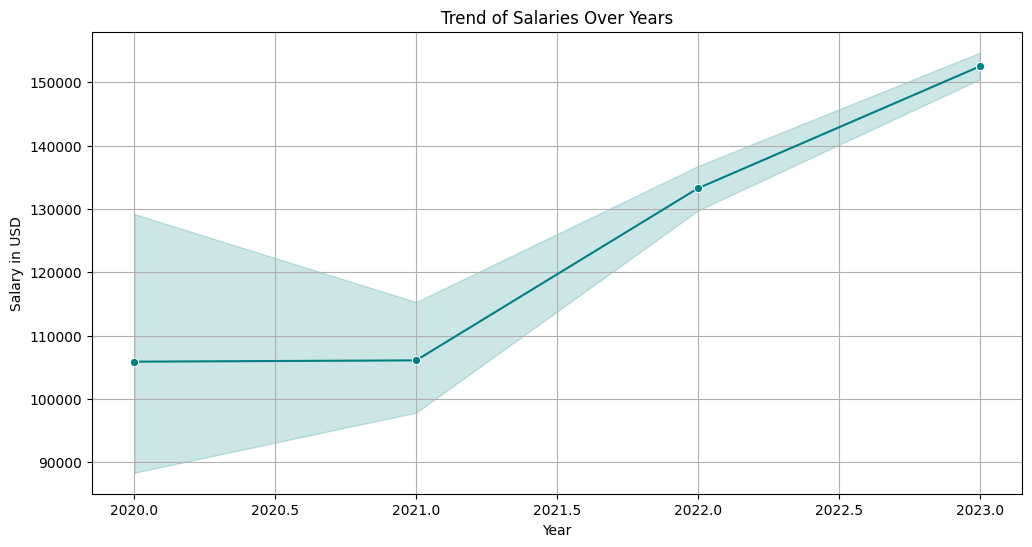

In [12]:
# Plotting time series trends of salaries over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='work_year', y='salary_in_usd', marker='o', color="teal")
plt.title('Trend of Salaries Over Years')
plt.xlabel('Year')
plt.ylabel('Salary in USD')
plt.grid(True)
plt.show()

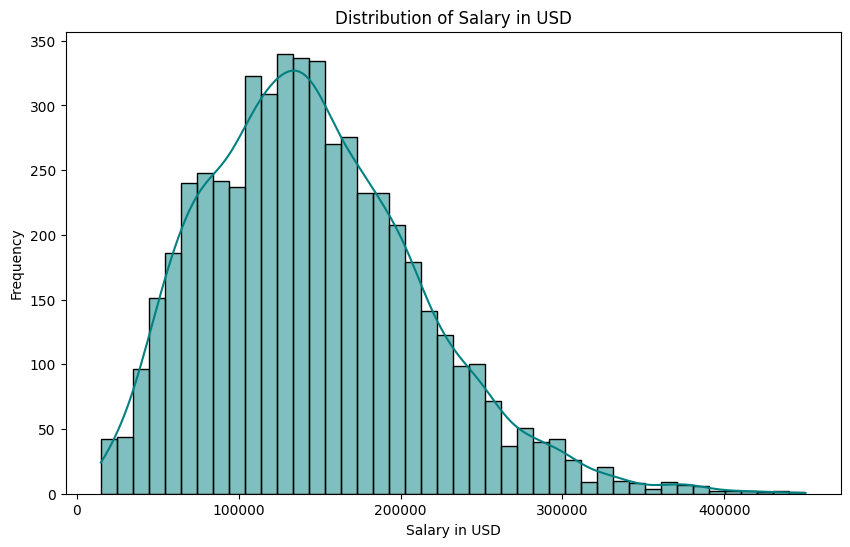

In [13]:
# Plotting the distribution of 'salary_in_usd'
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], kde=True, color="teal")
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.title('Distribution of Salary in USD')
plt.show()



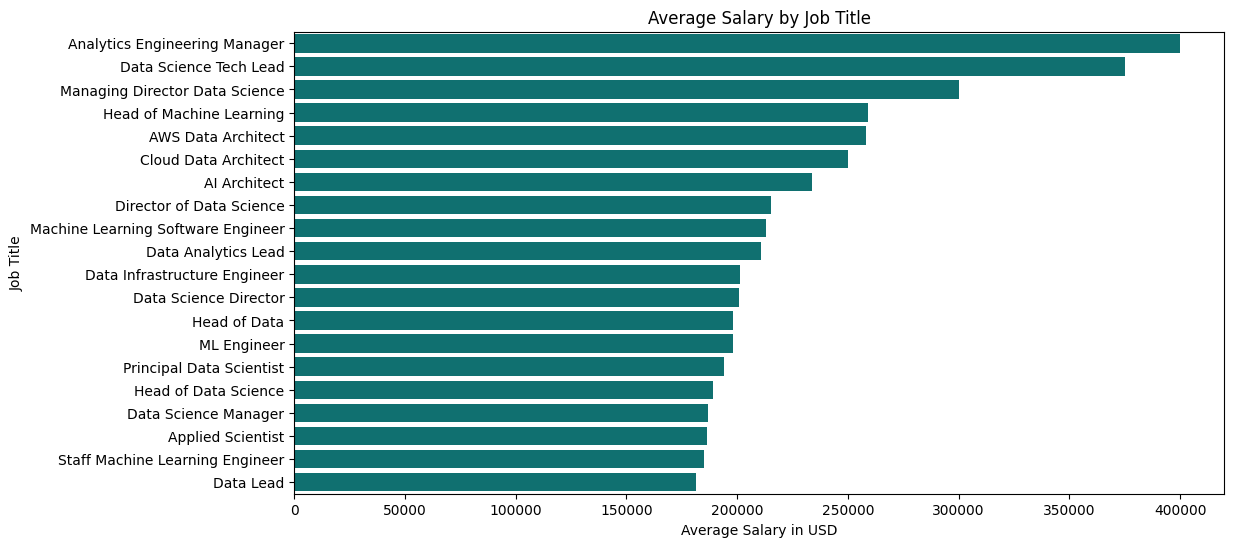

In [14]:
avg_salary_by_title = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_salary_by_title.values, y=avg_salary_by_title.index, color="teal")
plt.title('Average Salary by Job Title')
plt.xlabel('Average Salary in USD')
plt.ylabel('Job Title')
plt.show()

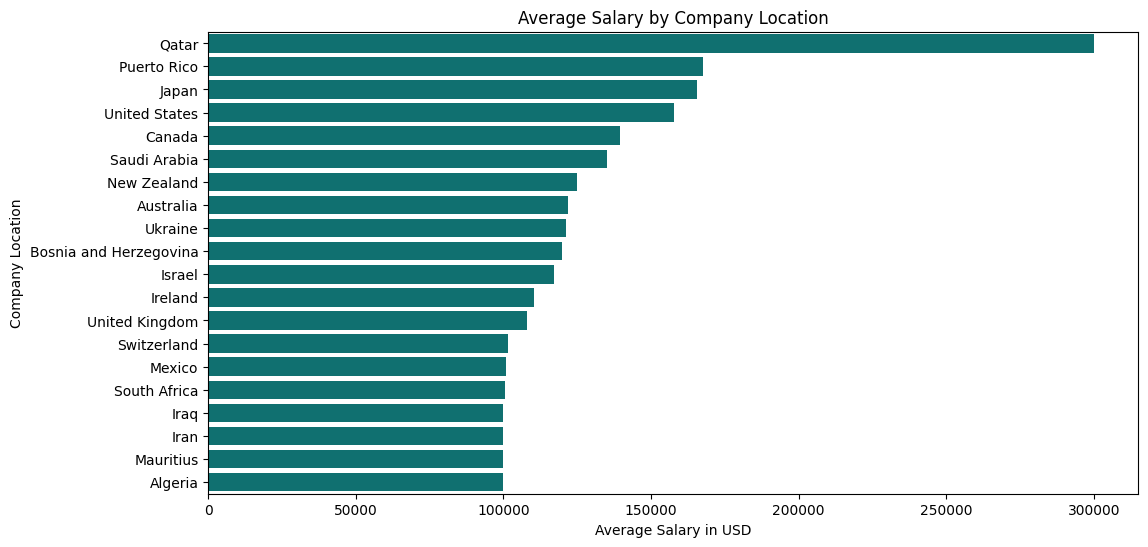

In [15]:
avg_salary_by_title = df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_salary_by_title.values, y=avg_salary_by_title.index, color="teal")
plt.title('Average Salary by Company Location')
plt.xlabel('Average Salary in USD')
plt.ylabel('Company Location')
plt.show()

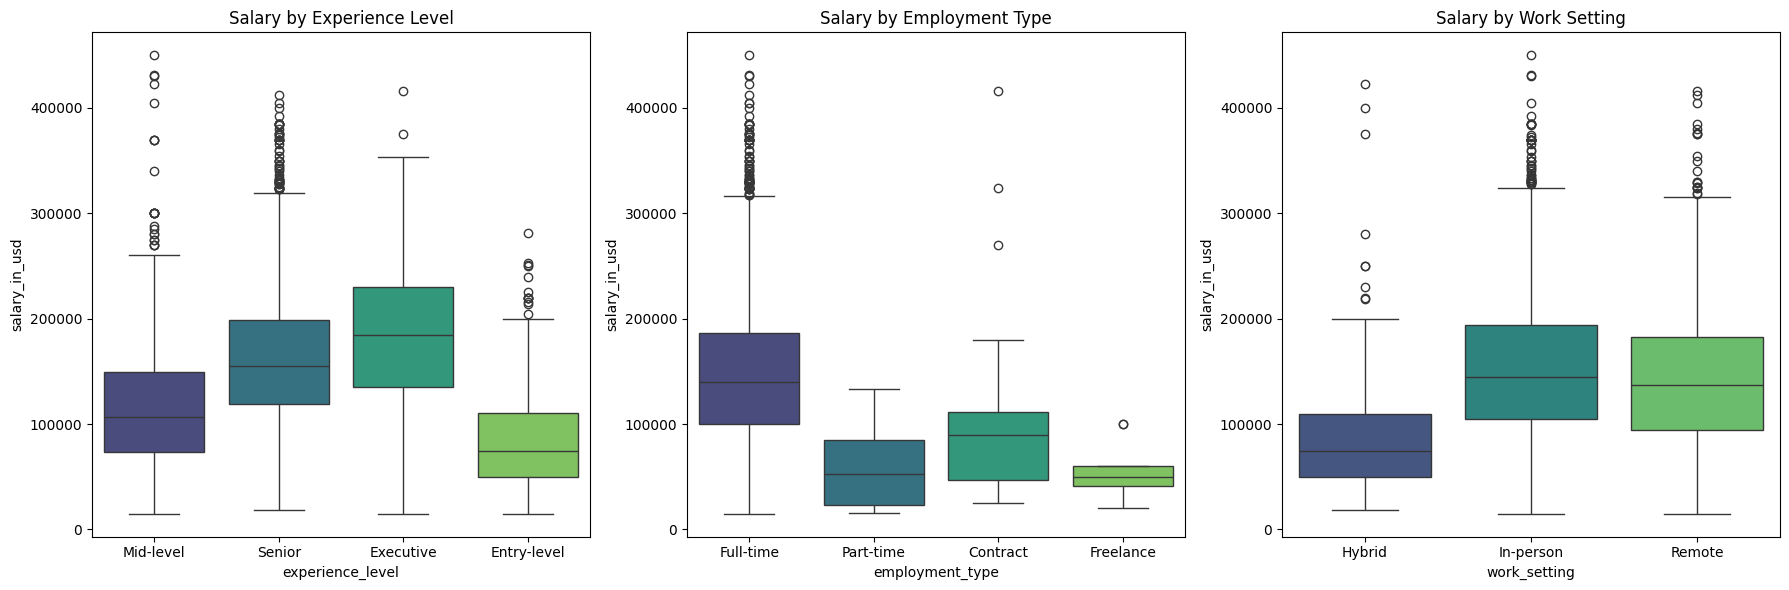

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(ax=axes[0], x='experience_level', hue='experience_level', y='salary_in_usd', data=df, palette="viridis", legend=False)
axes[0].set_title('Salary by Experience Level')

sns.boxplot(ax=axes[1], x='employment_type', hue='employment_type', y='salary_in_usd', data=df, palette="viridis", legend=False)
axes[1].set_title('Salary by Employment Type')

sns.boxplot(ax=axes[2], x='work_setting', hue='work_setting', y='salary_in_usd', data=df, palette="viridis", legend=False)
axes[2].set_title('Salary by Work Setting')

plt.tight_layout()
plt.show()

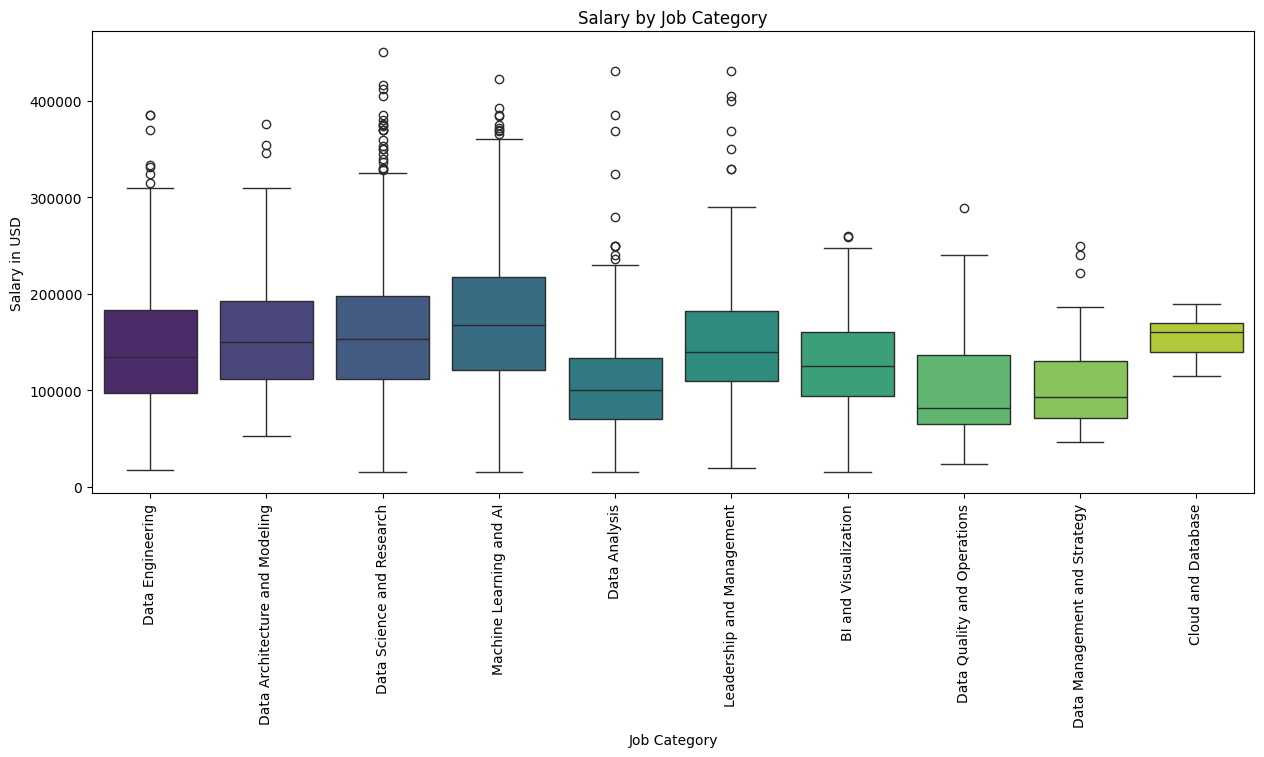

In [17]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='job_category', hue='job_category', y='salary_in_usd', data=df, palette="viridis", legend=False)
plt.title('Salary by Job Category')
plt.xticks(rotation=90)
plt.xlabel('Job Category')
plt.ylabel('Salary in USD')
plt.show()

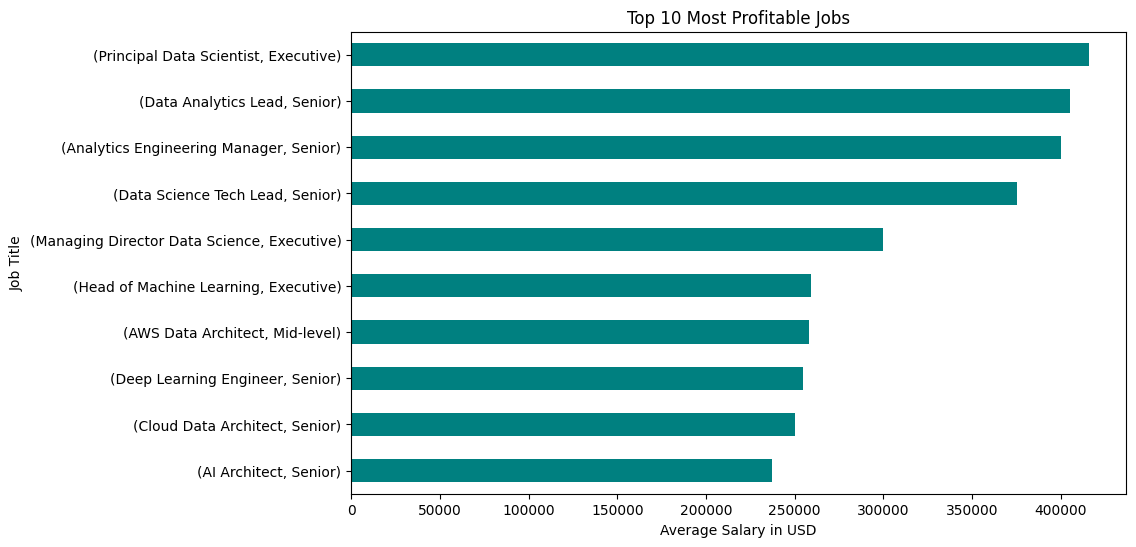

In [18]:

average_salaries = df.groupby(['job_title', 'experience_level'])['salary_in_usd'].mean()

top_5_profitable_jobs = average_salaries.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_5_profitable_jobs.plot(kind='barh', color="teal")
plt.xlabel('Average Salary in USD')
plt.ylabel('Job Title')
plt.title('Top 10 Most Profitable Jobs')
plt.gca().invert_yaxis() 
plt.show()

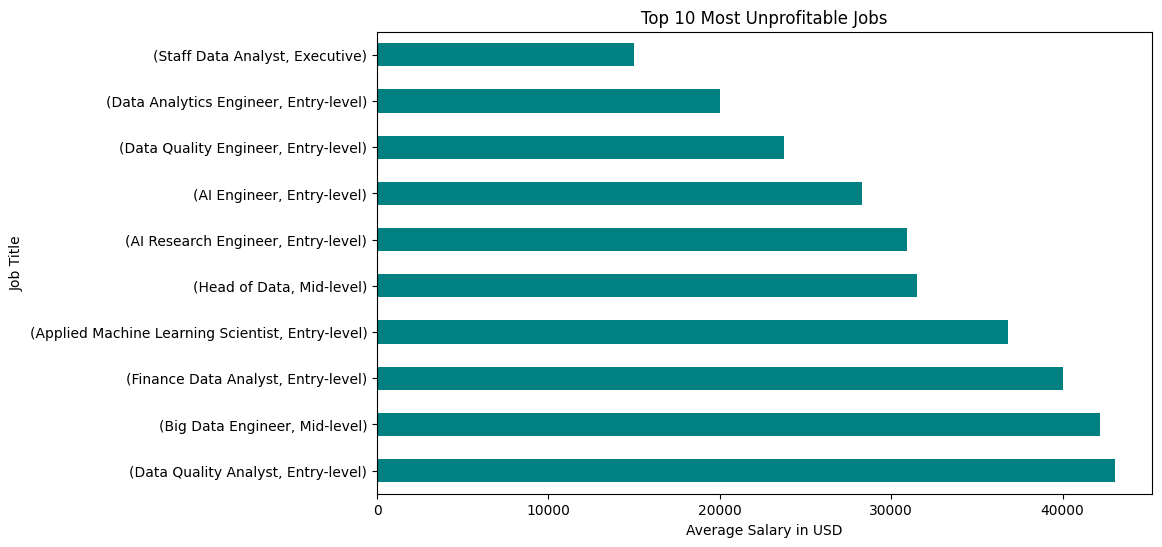

In [19]:
bottom_5_profitable_jobs = average_salaries.sort_values(ascending=True).head(10)

plt.figure(figsize=(10, 6))
bottom_5_profitable_jobs.plot(kind='barh', color="teal")
plt.xlabel('Average Salary in USD')
plt.ylabel('Job Title')
plt.title('Top 10 Most Unprofitable Jobs')
plt.gca().invert_yaxis() 
plt.show()

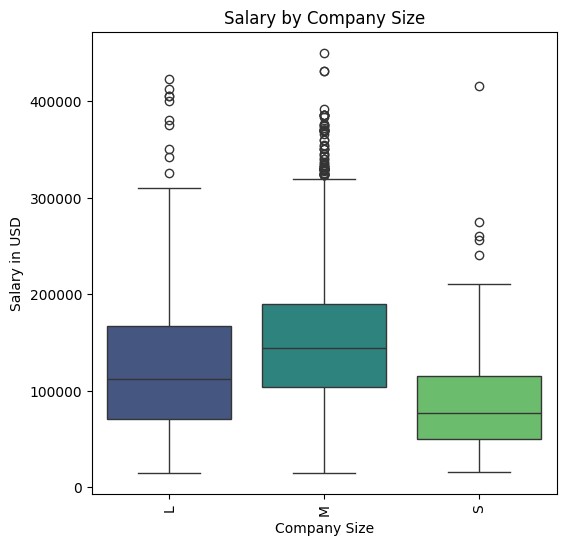

In [20]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='company_size', hue='company_size', y='salary_in_usd', data=df, palette="viridis", legend=False)
plt.title('Salary by Company Size')
plt.xticks(rotation=90)
plt.xlabel('Company Size')
plt.ylabel('Salary in USD')
plt.show()

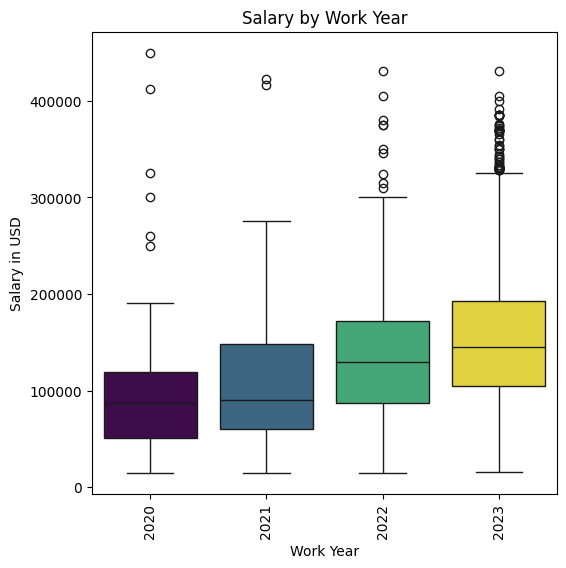

In [21]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='work_year', hue='work_year', y='salary_in_usd', data=df, palette="viridis", legend=False)
plt.title('Salary by Work Year')
plt.xticks(rotation=90)
plt.xlabel('Work Year')
plt.ylabel('Salary in USD')
plt.show()

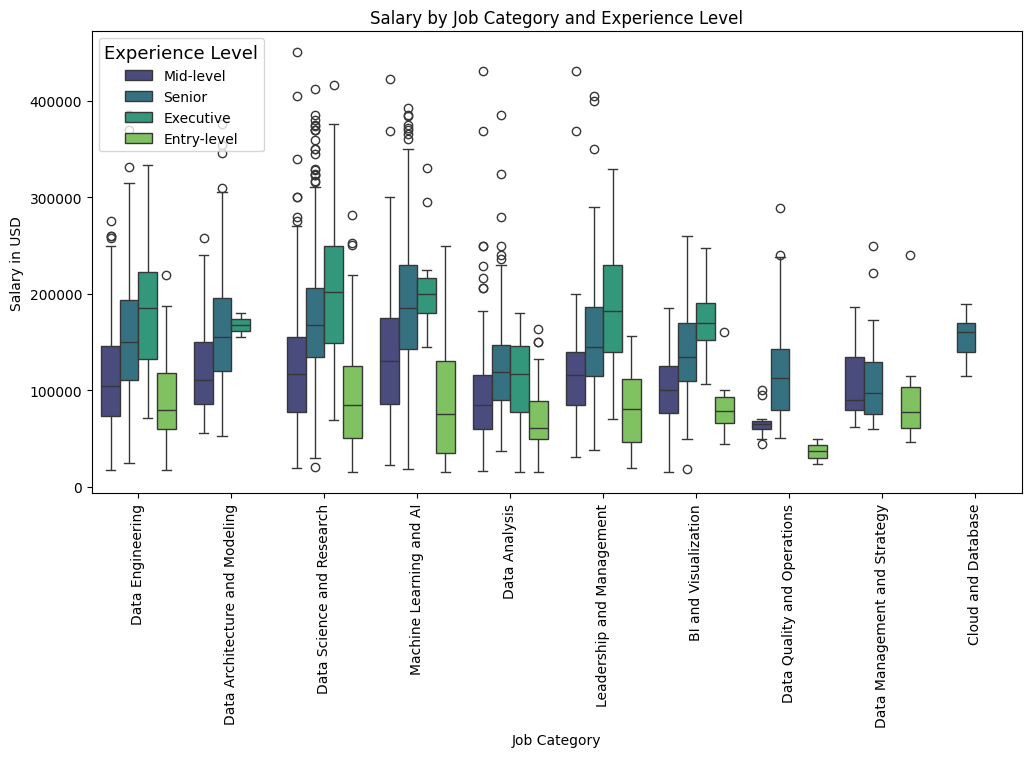

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='job_category', y='salary_in_usd', hue='experience_level', data=df, palette="viridis")
plt.title('Salary by Job Category and Experience Level')
plt.xlabel('Job Category')
plt.ylabel('Salary in USD')
plt.legend(title='Experience Level', title_fontsize='13', loc='upper left')
plt.xticks(rotation=90)
plt.show()


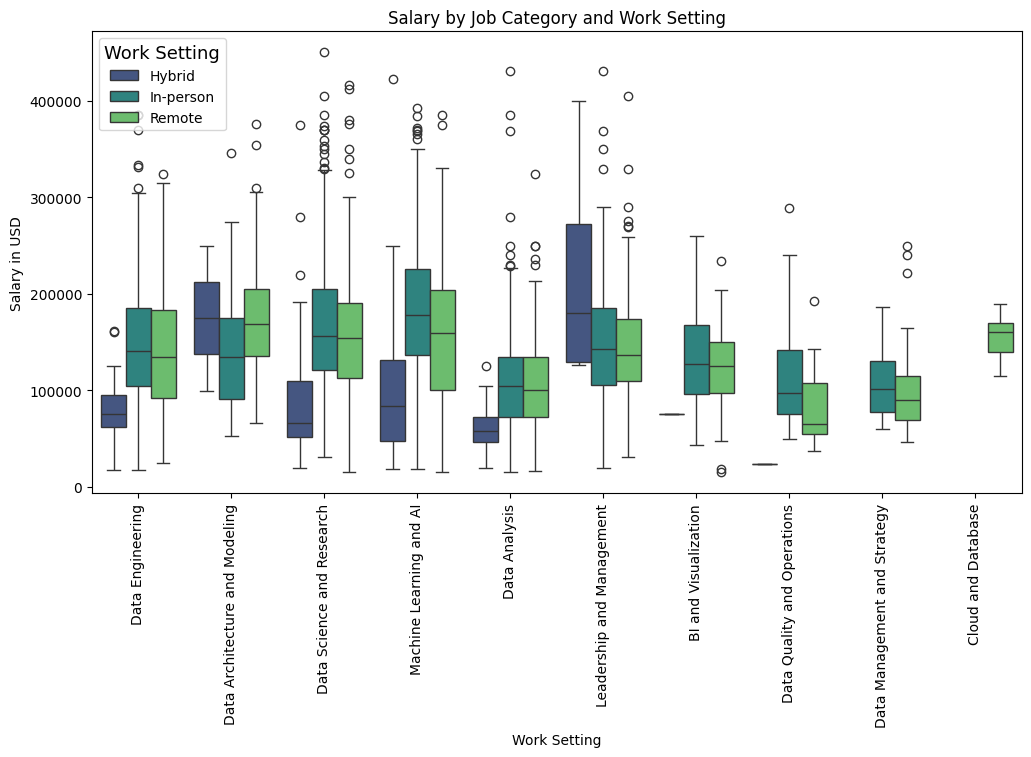

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='job_category', y='salary_in_usd', hue='work_setting', data=df, palette="viridis")
plt.title('Salary by Job Category and Work Setting')
plt.xlabel('Work Setting')
plt.ylabel('Salary in USD')
plt.legend(title='Work Setting', title_fontsize='13', loc='upper left')
plt.xticks(rotation=90)
plt.show()


Looking for outliers:

he Z-score measures how many standard deviations a data point is away from the mean. Typically, data points with a Z-score beyond a certain threshold (e.g., 2 or 3 standard deviations) are considered outliers.


In [24]:
# Calculate Z-scores for 'salary_in_usd'
z_scores = stats.zscore(df['salary_in_usd'])

# Define a threshold (e.g., 3 standard deviations)
threshold = 3

# Find the indices of outliers
outlier_indices = np.where(np.abs(z_scores) > threshold)

# Filter the DataFrame to get rows with outliers
outliers = df.iloc[outlier_indices].sort_values(by='salary_in_usd', ascending=False)
outliers.head(10)


,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
5145,2020,Research Scientist,Data Science and Research,USD,450000,450000,United States,Mid-level,Full-time,In-person,United States,M
4180,2022,Data Analyst,Data Analysis,GBP,350000,430967,United Kingdom,Mid-level,Full-time,In-person,United Kingdom,M
3286,2023,Analytics Engineer,Leadership and Management,GBP,350000,430640,United Kingdom,Mid-level,Full-time,In-person,United Kingdom,M
5334,2021,Applied Machine Learning Scientist,Machine Learning and AI,USD,423000,423000,United States,Mid-level,Full-time,Hybrid,United States,L
5274,2021,Principal Data Scientist,Data Science and Research,USD,416000,416000,United States,Executive,Contract,Remote,United States,S
5337,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
5091,2022,Data Analytics Lead,Leadership and Management,USD,405000,405000,United States,Senior,Full-time,Remote,United States,L
1256,2023,Research Scientist,Data Science and Research,USD,405000,405000,United States,Mid-level,Full-time,In-person,United States,L
2929,2023,Analytics Engineering Manager,Leadership and Management,GBP,325000,399880,United Kingdom,Senior,Full-time,Hybrid,United Kingdom,L
2633,2023,Machine Learning Engineer,Machine Learning and AI,USD,392000,392000,United States,Senior,Full-time,In-person,United States,M


We can see that 63 rows from our dataset is 3 standard deviations away from mean. Let's drop them.

In [25]:
df.drop(outliers.index, inplace=True)


Let's plot Salary by Work Year again. Should look better after ourliers cleaning.

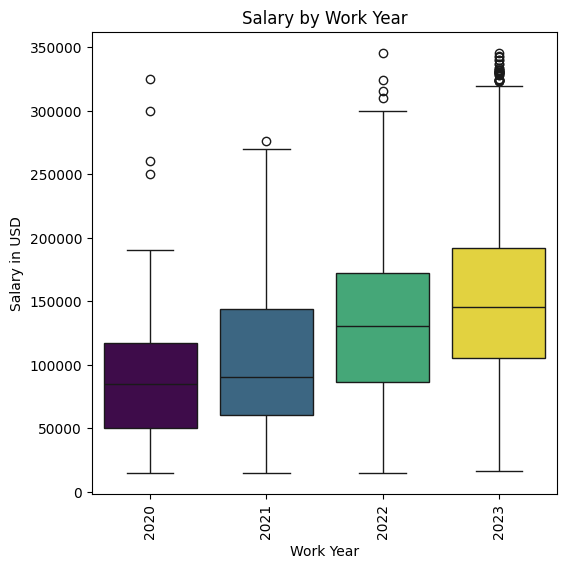

In [26]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='work_year', hue='work_year', y='salary_in_usd', data=df, palette="viridis", legend=False)
plt.title('Salary by Work Year')
plt.xticks(rotation=90)
plt.xlabel('Work Year')
plt.ylabel('Salary in USD')
plt.show()

In [47]:
df.job_title.value_counts()

job_title
Data Engineer                           1098
Data Scientist                          1035
Data Analyst                             741
Machine Learning Engineer                516
Analytics Engineer                       205
                                        ... 
Sales Data Analyst                         1
Machine Learning Operations Engineer       1
Deep Learning Researcher                   1
BI Data Engineer                           1
Marketing Data Engineer                    1
Name: count, Length: 123, dtype: int64

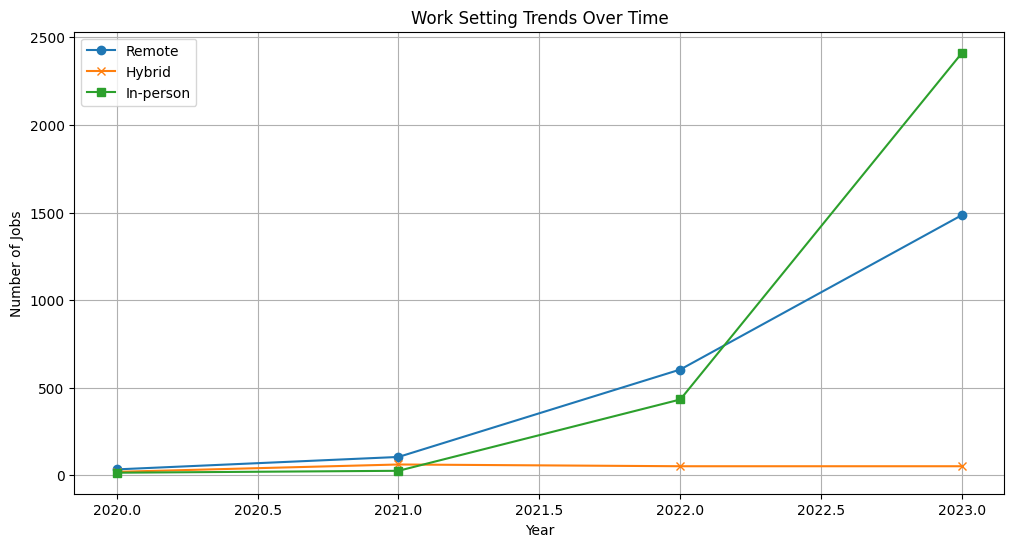

In [48]:
remote_work_df = df[df['work_setting'] == 'Remote']
hybrid_work_df = df[df['work_setting'] == 'Hybrid']
onsite_work_df = df[df['work_setting'] == 'In-person']

remote_work_count = remote_work_df.groupby('work_year').size()
hybrid_work_count = hybrid_work_df.groupby('work_year').size()
onsite_work_count = onsite_work_df.groupby('work_year').size()

plt.figure(figsize=(12, 6))
remote_work_count.plot(kind='line', marker='o', label='Remote')
hybrid_work_count.plot(kind='line', marker='x', label='Hybrid')
onsite_work_count.plot(kind='line', marker='s', label='In-person')
plt.xlabel('Year')
plt.ylabel('Number of Jobs')
plt.title('Work Setting Trends Over Time')
plt.legend()
plt.grid(True)
plt.show()


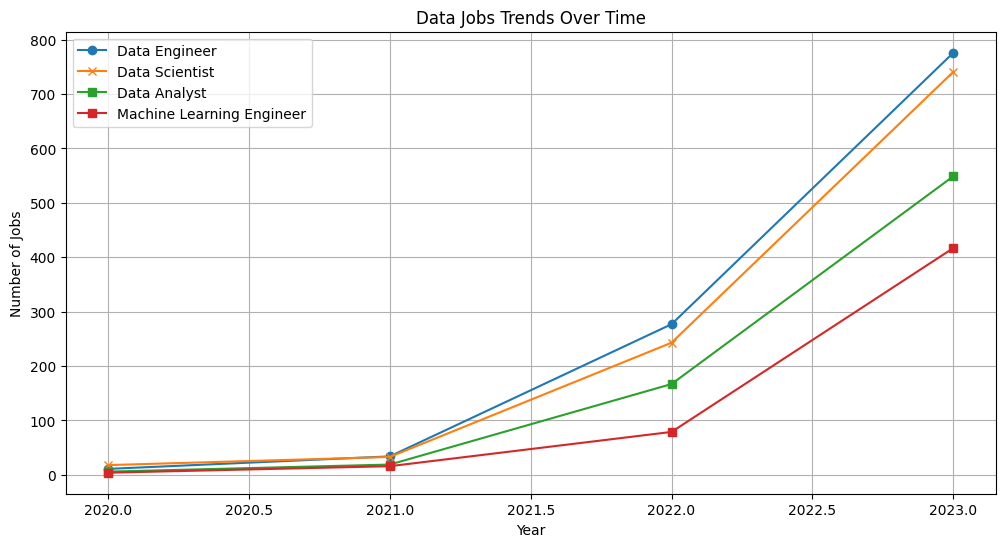

In [49]:
de_work_df = df[df['job_title'] == 'Data Engineer']
ds_work_df = df[df['job_title'] == 'Data Scientist']
da_work_df = df[df['job_title'] == 'Data Analyst']
ml_work_df = df[df['job_title'] == 'Machine Learning Engineer']

de_work_count = de_work_df.groupby('work_year').size()
ds_work_count = ds_work_df.groupby('work_year').size()
da_work_count = da_work_df.groupby('work_year').size()
ml_work_count = ml_work_df.groupby('work_year').size()

plt.figure(figsize=(12, 6))
de_work_count.plot(kind='line', marker='o', label='Data Engineer')
ds_work_count.plot(kind='line', marker='x', label='Data Scientist')
da_work_count.plot(kind='line', marker='s', label='Data Analyst')
ml_work_count.plot(kind='line', marker='s', label='Machine Learning Engineer')
plt.xlabel('Year')
plt.ylabel('Number of Jobs')
plt.title('Data Jobs Trends Over Time')
plt.legend()
plt.grid(True)
plt.show()

We have a large number of countries listed in both the 'employee_residence' and 'company_location' columns. To simplify, let's retain the 10 most common countries in each column and label all other countries as 'Rare'.

<Figure size 1500x800 with 0 Axes>

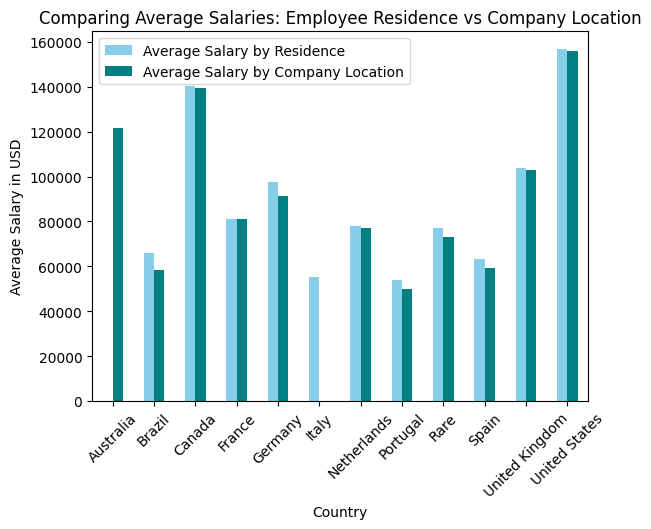

In [27]:
# Replace countries not in the top 10 with 'Rare'
top_employee_10_countries = df['employee_residence'].value_counts().nlargest(10).index.tolist()
top_company_10_countries = df['company_location'].value_counts().nlargest(10).index.tolist()
df['employee_residence'] = df['employee_residence'].apply(lambda x: x if x in top_employee_10_countries else 'Rare')
df['company_location'] = df['company_location'].apply(lambda x: x if x in top_company_10_countries else 'Rare')
df

# Grouping and calculating the mean salary by 'employee_residence'
average_salary_by_residence = df.groupby('employee_residence')['salary_in_usd'].mean()

# Grouping and calculating the mean salary by 'company_location'
average_salary_by_company_location = df.groupby('company_location')['salary_in_usd'].mean()

combined_salaries = pd.DataFrame({
    'Average Salary by Residence': average_salary_by_residence,
    'Average Salary by Company Location': average_salary_by_company_location
}).reset_index()

plt.figure(figsize=(15, 8))
ax = combined_salaries.plot(x='index', y=['Average Salary by Residence', 'Average Salary by Company Location'], kind='bar', color=['skyblue', 'teal'])
plt.title('Comparing Average Salaries: Employee Residence vs Company Location')
plt.xlabel('Country')
plt.ylabel('Average Salary in USD')
plt.xticks(rotation=45)
plt.legend()
plt.show()



## Feature Extraction

In [39]:

# Splitting the dataset into 70% train, 15% validation, and 15% test
train, temp = train_test_split(df, test_size=0.3, random_state=42)
val, test = train_test_split(temp, test_size=0.5, random_state=42)

# Label Encoder
label_encoder = LabelEncoder()
train['work_year'] = label_encoder.fit_transform(train['work_year'])
val['work_year'] = label_encoder.transform(val['work_year'])
test['work_year'] = label_encoder.transform(test['work_year'])

# One Hot Encoder
categorical_cols = ['job_category', 'employee_residence', 'experience_level', 
                    'employment_type', 'work_setting', 'company_location', 'company_size']

one_hot_encoder = OneHotEncoder()
encoded_columns = one_hot_encoder.fit_transform(train[categorical_cols]).toarray()
encoded_col_names = one_hot_encoder.get_feature_names_out(categorical_cols)
encoded_df = pd.DataFrame(encoded_columns, columns=encoded_col_names, index=train.index)
train = pd.concat([train, encoded_df], axis=1)

encoded_val_columns = one_hot_encoder.transform(val[categorical_cols]).toarray()
encoded_val_col_names = one_hot_encoder.get_feature_names_out(categorical_cols)
encoded_val = pd.DataFrame(encoded_val_columns, columns=encoded_val_col_names, index=val.index)
val = pd.concat([val, encoded_val], axis=1)

encoded_test_columns = one_hot_encoder.transform(test[categorical_cols]).toarray()
encoded_test_col_names = one_hot_encoder.get_feature_names_out(categorical_cols)
encoded_test = pd.DataFrame(encoded_test_columns, columns=encoded_test_col_names, index=test.index)
test = pd.concat([test, encoded_test], axis=1)

train.drop(columns=['job_title', 'salary_currency', 'salary','job_category', 'employee_residence', 'experience_level', 'employment_type',
                    "work_setting", 'company_location','salary', 'company_size'], axis=1, inplace=True )
val.drop(columns=['job_title', 'salary_currency','salary',  'job_category', 'employee_residence', 'experience_level', 'employment_type',
                    "work_setting", 'company_location', 'company_size'], axis=1, inplace=True )
test.drop(columns=['job_title', 'salary_currency','salary',  'job_category', 'employee_residence', 'experience_level', 'employment_type',
                    "work_setting", 'company_location', 'company_size'], axis=1, inplace=True )

## Features correlation matrix

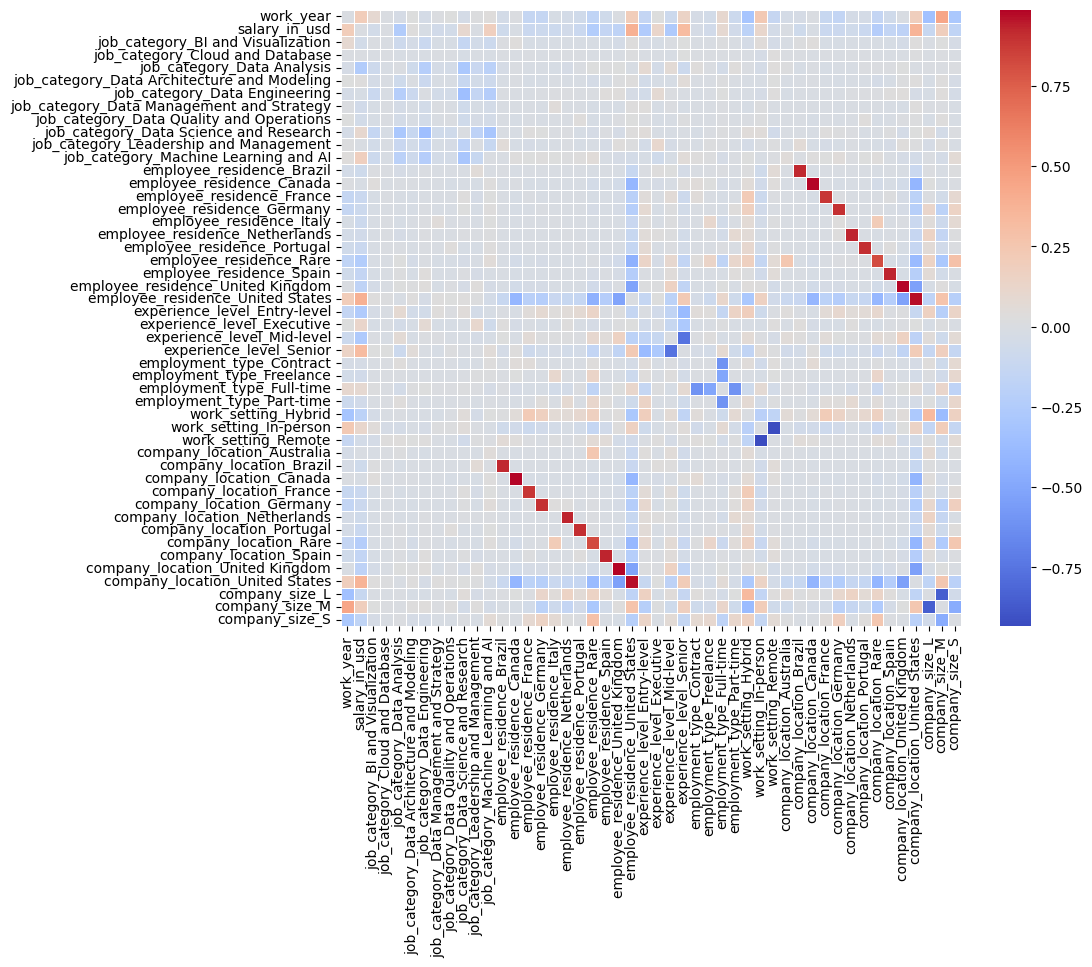

In [29]:
corr = train.corr()

plt.figure(figsize=(10, 8))

np.fill_diagonal(corr.values, 0)

sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='coolwarm',   
            annot=False, 
            linewidths=.5)

plt.show()

## Features importance

### Model Evaluation Metrics
We are using several metrics to evaluate the performance of our regression model. These metrics are crucial to understand how well our model is predicting and where it might be falling short.

**R-squared (R²) Score**:

The R² score represents the proportion of variance in the dependent variable that is predictable from the independent variables.
It provides a measure of how well the observed outcomes are replicated by the model.
A value of 1 implies perfect prediction, while a value closer to 0 suggests the model fails to accurately model the data.

**Mean Squared Error (MSE)**:

MSE measures the average of the squares of the errors, i.e., the average squared difference between the estimated values and the actual value.
A lower MSE indicates better performance, with a value of 0 being the ideal.

**Mean Absolute Error (MAE)**:

MAE is the average of the absolute differences between the predicted values and the observed actual outcomes.
Unlike MSE, MAE provides a linear score, which means all individual differences are weighted equally in the average.

**Mean Absolute Percentage Error (MAPE)**:

MAPE measures the accuracy as a percentage, and it's particularly useful for comparing the accuracy of different models or forecasting techniques.
It's a measure of prediction accuracy of a forecasting method in percentage terms, with lower values indicating better predictive accuracy.

The np.expm1() function is used to inverse the log transformation (applied during the preprocessing step) to bring the predictions back to their original scale, which allows for a more intuitive understanding of these metrics.

In [30]:
def print_metrics(model, X_train, y_train, X_val, y_val):
    
    y_pred_val = model.predict(X_val)
    y_pred_train = model.predict(X_train)

    r_squared_val = r2_score(np.expm1(y_val), np.expm1(y_pred_val))  
    mse_val = mean_squared_error(np.expm1(y_val), np.expm1(y_pred_val)) 
    mae = mean_absolute_error(np.expm1(y_val), np.expm1(y_pred_val))
    mape = mean_absolute_percentage_error(np.expm1(y_val), np.expm1(y_pred_val))

    mae_train = mean_absolute_error(np.expm1(y_train), np.expm1(y_pred_train))
    mape_train = mean_absolute_percentage_error(np.expm1(y_train), np.expm1(y_pred_train))

    print(f"Mean Absolute Error (Train): {mae_train:.2f}")
    print(f"Mean Absolute Error Percentage (Train): {mape_train:.2f}")
    print("--------------------------------------")

    print(f"R-squared (Validation): {r_squared_val:.2f}")
    print(f"Mean Squared Error (Validation): {mse_val:.2f}")
    print(f"Mean Absolute Error (Validation): {mae:.2f}")
    print(f"Mean Absolute Error Percentage (Validation): {mape:.2f}")

### Linear Regression

LinearRegression
Mean Absolute Error (Train): 39035.08
Mean Absolute Error Percentage (Train): 0.31
--------------------------------------
R-squared (Validation): 0.41
Mean Squared Error (Validation): 2522260452.23
Mean Absolute Error (Validation): 38619.69
Mean Absolute Error Percentage (Validation): 0.31



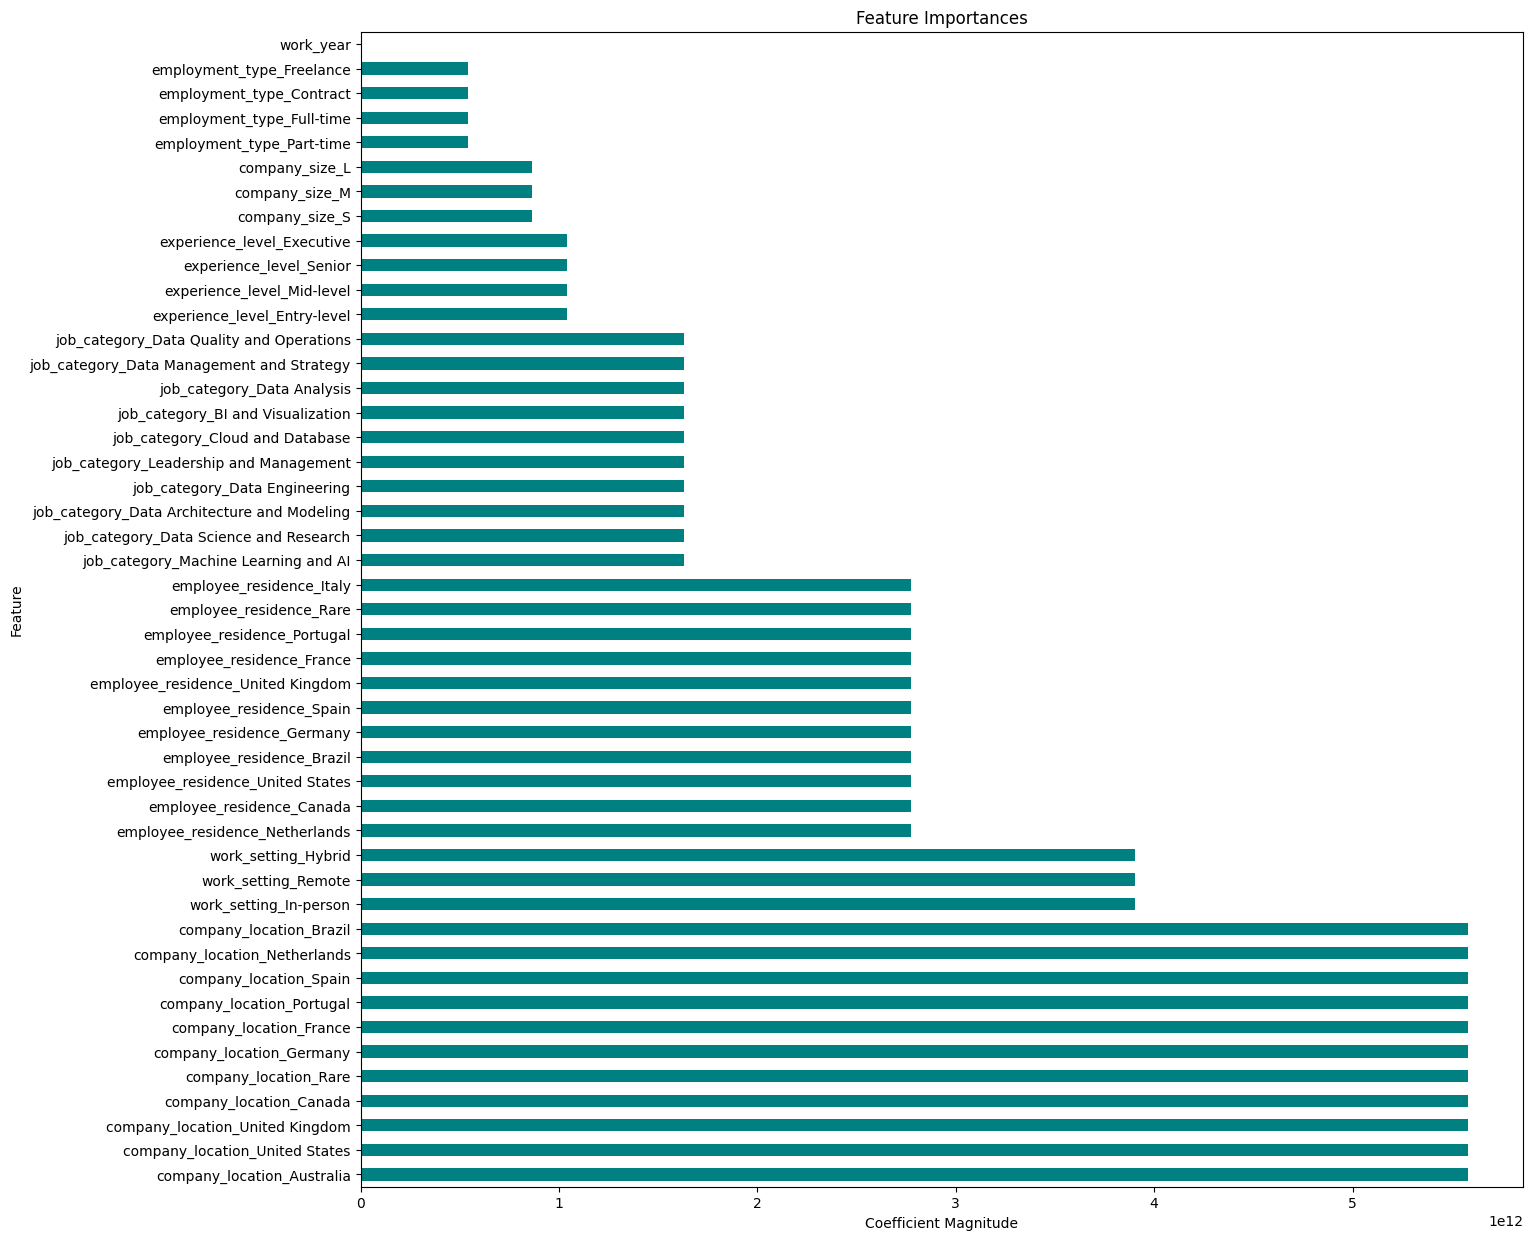

In [41]:
X_train = train.drop(['salary_in_usd'], axis=1) 
y_train = np.log1p(train['salary_in_usd'])
X_val = val.drop(['salary_in_usd'], axis=1)
y_val = np.log1p(val['salary_in_usd'])
X_test = test.drop(['salary_in_usd'], axis=1)
y_test = np.log1p(test['salary_in_usd'])

lr = LinearRegression()
lr.fit(X_train, y_train)
print("LinearRegression")
print_metrics(lr, X_train, y_train, X_val, y_val)
print("")

coefficients = lr.coef_

feature_importance = pd.DataFrame(coefficients, index=X_train.columns, columns=["Importance"])
feature_importance["Absolute Importance"] = feature_importance["Importance"].abs()
feature_importance = feature_importance.sort_values(by="Absolute Importance", ascending=False)


plt.figure(figsize=(15, 15))
feature_importance['Absolute Importance'].plot(kind='barh', color="teal")
plt.title('Feature Importances')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.show()

### RandomForest Regressor

RandomForestRegressor
Mean Absolute Error (Train): 35566.17
Mean Absolute Error Percentage (Train): 0.27
--------------------------------------
R-squared (Validation): 0.40
Mean Squared Error (Validation): 2591360997.13
Mean Absolute Error (Validation): 39800.59
Mean Absolute Error Percentage (Validation): 0.32



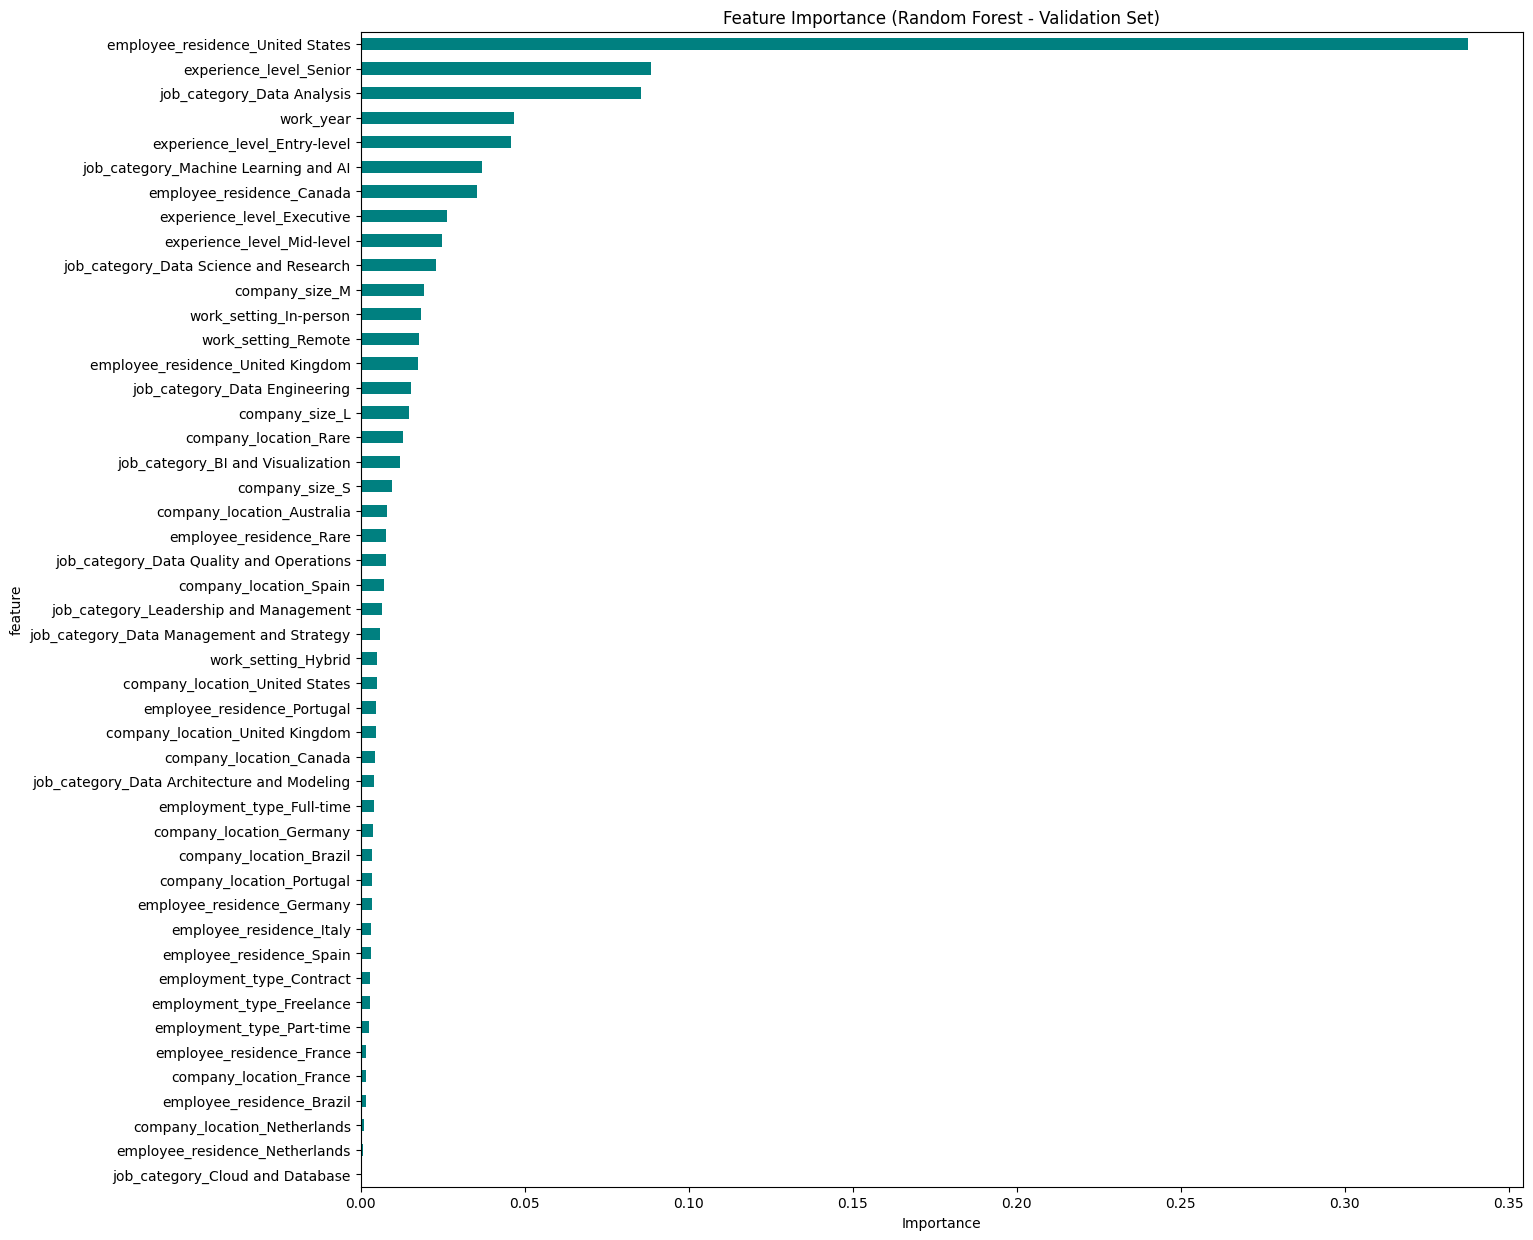

In [32]:
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
print("RandomForestRegressor")
print_metrics(rf_reg, X_train, y_train, X_val, y_val)
print("")

importance_val_rf = rf_reg.feature_importances_
feature_importance_val_rf = pd.DataFrame({'feature': X_train.columns, 'importance': importance_val_rf})
feature_importance_val_rf.sort_values(by='importance', ascending=True, inplace=True)

plt.figure(figsize=(15, 15))
feature_importance_val_rf.set_index('feature')['importance'].plot(kind='barh', color="teal")
plt.title('Feature Importance (Random Forest - Validation Set)')
plt.xlabel('Importance')
plt.show()

### CatBoost Regressor

CatBoostRegressor
Mean Absolute Error (Train): 35566.17
Mean Absolute Error Percentage (Train): 0.27
--------------------------------------
R-squared (Validation): 0.40
Mean Squared Error (Validation): 2591360997.13
Mean Absolute Error (Validation): 39800.59
Mean Absolute Error Percentage (Validation): 0.32



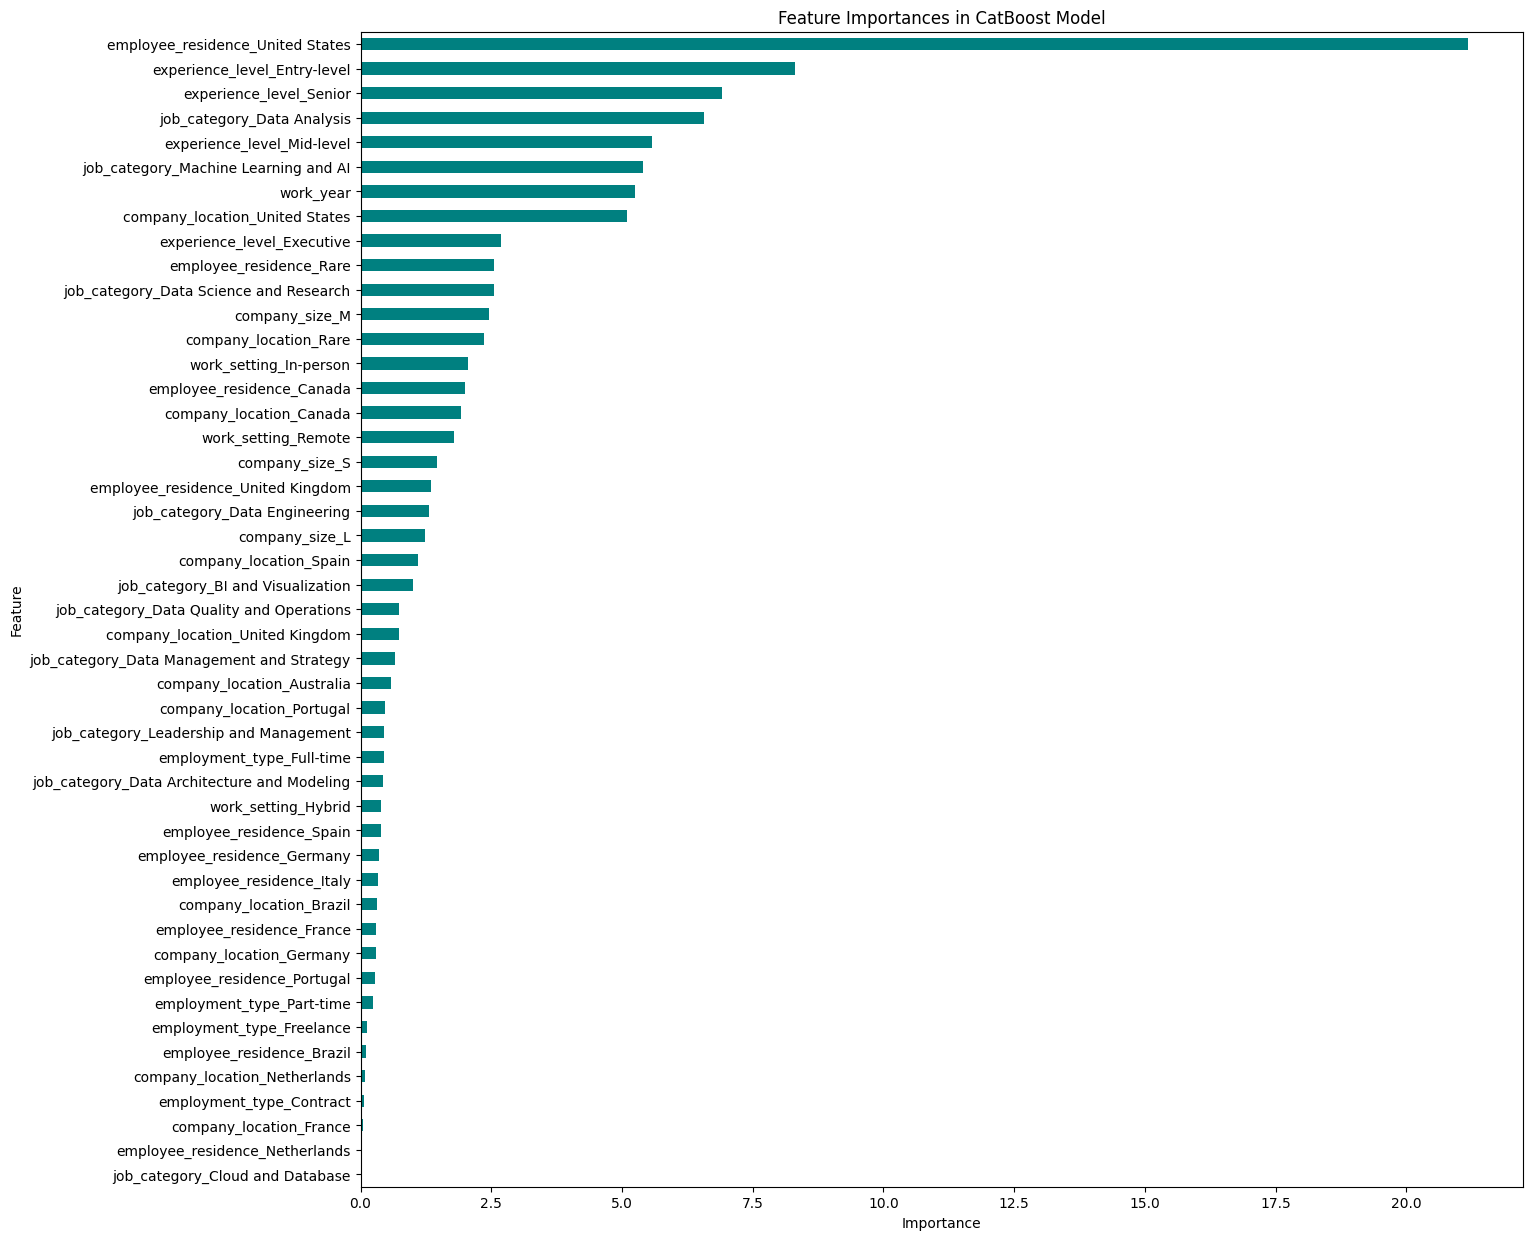

In [33]:
catboost_model = CatBoostRegressor(random_state=42, verbose=False)
catboost_model.set_feature_names(X_train.columns)
catboost_model.fit(X_train, y_train)
print("CatBoostRegressor")
print_metrics(rf_reg, X_train, y_train, X_val, y_val)
print("")

feature_importances = catboost_model.get_feature_importance()

feature_importance_df = pd.DataFrame({
    'Feature': catboost_model.feature_names_,
    'Importance': feature_importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(15, 15), dpi=100) 
feature_importance_df.set_index('Feature')['Importance'].plot(kind='barh', color="teal")
plt.title('Feature Importances in CatBoost Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In terms of features, you might notice that employment_type is useless in all 3 models, so we can easily exclude it from the features.

In [42]:
X_train.drop(columns=[ 'employment_type_Contract', 'employment_type_Freelance',
       'employment_type_Full-time', 'employment_type_Part-time',], axis=1, inplace=True )
X_val.drop(columns=[ 'employment_type_Contract', 'employment_type_Freelance',
       'employment_type_Full-time', 'employment_type_Part-time',], axis=1, inplace=True )
X_test.drop(columns=[ 'employment_type_Contract', 'employment_type_Freelance',
       'employment_type_Full-time', 'employment_type_Part-time',], axis=1, inplace=True )

In [54]:
models = {
    "LinearRegression": LinearRegression(),
    "RandomForestRegressor": RandomForestRegressor(random_state=42),
    "CatBoostRegressor": CatBoostRegressor(verbose=False),
    "SVR": SVR()

}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name)
    print_metrics(model, X_train, y_train, X_val, y_val)
    print("")

LinearRegression
Mean Absolute Error (Train): 39039.88
Mean Absolute Error Percentage (Train): 0.31
--------------------------------------
R-squared (Validation): 0.41
Mean Squared Error (Validation): 2529218108.18
Mean Absolute Error (Validation): 38731.30
Mean Absolute Error Percentage (Validation): 0.31

RandomForestRegressor
Mean Absolute Error (Train): 35616.65
Mean Absolute Error Percentage (Train): 0.27
--------------------------------------
R-squared (Validation): 0.40
Mean Squared Error (Validation): 2592720103.44
Mean Absolute Error (Validation): 39795.80
Mean Absolute Error Percentage (Validation): 0.32

CatBoostRegressor
Mean Absolute Error (Train): 36102.49
Mean Absolute Error Percentage (Train): 0.27
--------------------------------------
R-squared (Validation): 0.40
Mean Squared Error (Validation): 2552768361.13
Mean Absolute Error (Validation): 39232.43
Mean Absolute Error Percentage (Validation): 0.32

SVR
Mean Absolute Error (Train): 37488.94
Mean Absolute Error Perce

From what we can see, all three models are making pretty big error when predicting the training data, and they're almost making the same error on the validation data too. This suggests that we have high bias.

Typically, to improve our model's performance, with high bias we should consider gathering more data and extracting additional features. Additionally, exploring more complex models could also be beneficial.

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping


n_features = X_train.shape[1]

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(n_features,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error')
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto', restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[earlystop])



Epoch 1/100
116/116 [==============================] - 1s 3ms/step - loss: 26.8538 - val_loss: 0.4567
Epoch 2/100
116/116 [==============================] - 0s 2ms/step - loss: 0.2040 - val_loss: 0.1665
Epoch 3/100
116/116 [==============================] - 0s 2ms/step - loss: 0.1480 - val_loss: 0.1618
Epoch 4/100
116/116 [==============================] - 0s 2ms/step - loss: 0.1428 - val_loss: 0.1557
Epoch 5/100
116/116 [==============================] - 0s 2ms/step - loss: 0.1419 - val_loss: 0.1583
Epoch 6/100
116/116 [==============================] - 0s 2ms/step - loss: 0.1350 - val_loss: 0.1488
Epoch 7/100
116/116 [==============================] - 0s 2ms/step - loss: 0.1333 - val_loss: 0.1507
Epoch 8/100
116/116 [==============================] - 0s 2ms/step - loss: 0.1360 - val_loss: 0.1444
Epoch 9/100
116/116 [==============================] - 0s 2ms/step - loss: 0.1321 - val_loss: 0.1441
Epoch 10/100
116/116 [==============================] - 0s 2ms/step - loss: 0.1366 - val_l

In [64]:
def viz_metrics(history):
    # Visualizing Training and Validation Metrics
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

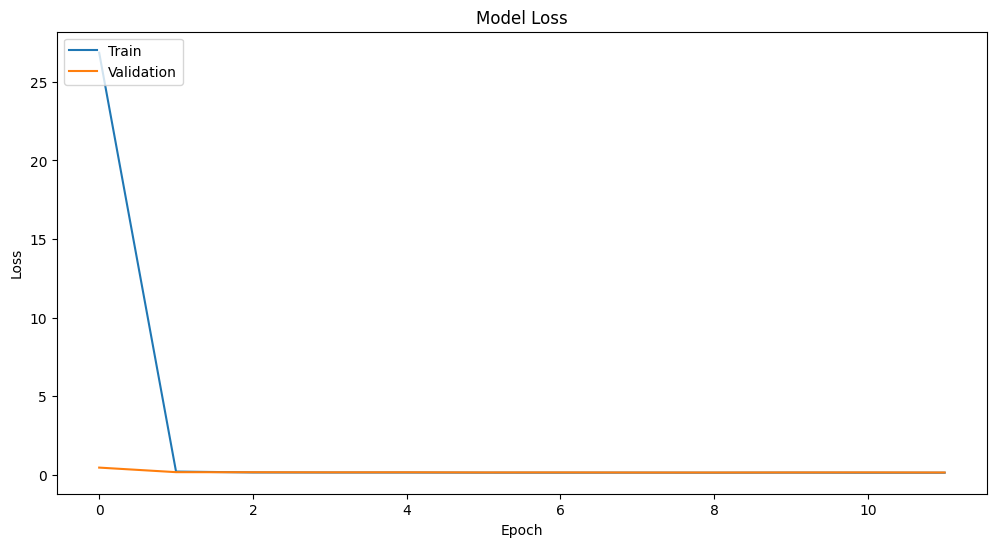

In [65]:
viz_metrics(history)

In [69]:
print_metrics(model, X_train, y_train, X_val, y_val)

116/116 [==============================] - 0s 900us/step
Mean Absolute Error (Train): 38190.32
Mean Absolute Error Percentage (Train): 0.29
--------------------------------------
R-squared (Validation): 0.38
Mean Squared Error (Validation): 2639627270.84
Mean Absolute Error (Validation): 39610.84
Mean Absolute Error Percentage (Validation): 0.31


### Analysis:

Linear Regression and Support Vector Regressor (SVR) have the highest R-squared values on the validation set, indicating better model fit.

Random Forest and CatBoost Regressors have similar R-squared values, but slightly higher mean absolute errors on the validation set.

Neural Network (NN) has the lowest R-squared value and the highest mean absolute error on the validation set among the models evaluated.

Overall, the Support Vector Regressor (SVR) appears to perform slightly better than the other models in terms of R-squared and MAE on the validation set. However, the lowest train error was in RandomForestRegressor and CatBoostRegressor.


## Cross validation for 3 models: SVR, RandomForestRegressor and CatBoostRegressor.

In [71]:
from sklearn.model_selection import cross_val_score

models = {
    "RandomForestRegressor": RandomForestRegressor(random_state=42),
    "CatBoostRegressor": CatBoostRegressor(verbose=False),
    "SVR": SVR()
}

# Perform cross-validation for each model
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    mae_scores = -scores
    mean_mae = mae_scores.mean()
    std_mae = mae_scores.std()
    print(f"{model_name} Mean Absolute Error (CV): {mean_mae:.2f} +/- {std_mae:.2f}")


RandomForestRegressor Mean Absolute Error (CV): 0.30 +/- 0.01
CatBoostRegressor Mean Absolute Error (CV): 0.29 +/- 0.01
SVR Mean Absolute Error (CV): 0.29 +/- 0.01


## Hyperparameters tuning for CatBoostRegressor and SVR

In [72]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV

catboost_model = CatBoostRegressor(verbose=False, random_state=42)

# Define the hyperparameters to search
param_grid = {
    'iterations': [100, 200, 300],  # Number of boosting iterations
    'depth': [6, 8, 10],            # Depth of the trees
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
}

grid_search_catboost = GridSearchCV(catboost_model, param_grid, cv=5, scoring='neg_mean_absolute_error')

grid_search_catboost.fit(X_train, y_train)

best_params_catboost = grid_search_catboost.best_params_
best_catboost_model = grid_search_catboost.best_estimator_

print("Best Hyperparameters for CatBoostRegressor:")
print(best_params_catboost)

catboost_mae = -grid_search_catboost.best_score_
print(f"Mean Absolute Error (CV) for CatBoostRegressor: {catboost_mae:.2f}")


Best Hyperparameters for CatBoostRegressor:
{'depth': 6, 'iterations': 100, 'learning_rate': 0.1}
Mean Absolute Error (CV) for CatBoostRegressor: 0.29


In [73]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV


svr_model = SVR()

# Define the hyperparameters to search
param_grid = {
    'C': [0.1, 1, 10],              # Regularization parameter
    'kernel': ['linear', 'rbf'],    # Kernel type
    'gamma': ['scale', 'auto']      # Kernel coefficient for 'rbf'
}

grid_search_svr = GridSearchCV(svr_model, param_grid, cv=5, scoring='neg_mean_absolute_error')

grid_search_svr.fit(X_train, y_train)

best_params_svr = grid_search_svr.best_params_
best_svr_model = grid_search_svr.best_estimator_

print("Best Hyperparameters for SVR:")
print(best_params_svr)

svr_mae = -grid_search_svr.best_score_
print(f"Mean Absolute Error (CV) for SVR: {svr_mae:.2f}")


Best Hyperparameters for SVR:
{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Mean Absolute Error (CV) for SVR: 0.29


In [74]:
from catboost import CatBoostRegressor

# Initialize the CatBoostRegressor model with the best hyperparameters
catboost_model = CatBoostRegressor(iterations=best_params_catboost['iterations'],
                                   depth=best_params_catboost['depth'],
                                   learning_rate=best_params_catboost['learning_rate'],
                                   verbose=False, random_state=42)

catboost_model.fit(X_train, y_train)

print_metrics(catboost_model, X_train, y_train, X_test, y_test)



Mean Absolute Error (Train): 37964.68
Mean Absolute Error Percentage (Train): 0.29
--------------------------------------
R-squared (Validation): 0.37
Mean Squared Error (Validation): 2282144154.58
Mean Absolute Error (Validation): 36687.85
Mean Absolute Error Percentage (Validation): 0.29


In [75]:
from sklearn.svm import SVR

# Initialize the SVR model with the best hyperparameters
svr_model = SVR(C=best_params_svr['C'], kernel=best_params_svr['kernel'], gamma=best_params_svr['gamma'])

svr_model.fit(X_train, y_train)

print_metrics(svr_model, X_train, y_train, X_test, y_test)


Mean Absolute Error (Train): 37488.94
Mean Absolute Error Percentage (Train): 0.29
--------------------------------------
R-squared (Validation): 0.37
Mean Squared Error (Validation): 2309968633.19
Mean Absolute Error (Validation): 36906.22
Mean Absolute Error Percentage (Validation): 0.30


Overall, both models demonstrate similar performance on the validation set, with CatBoostRegressor having a slightly lower MSE.

In a real-world scenario, collecting additional data would be essential. However, for the purpose of this learning project, it seems reasonable to proceed with the CatBoostRegressor model.